In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy.visualization import simple_norm
from astropy.visualization import ZScaleInterval
from scipy.ndimage import gaussian_filter
from astropy.stats import mad_std
from astropy.stats import sigma_clipped_stats
from photutils.aperture import CircularAperture
from photutils.aperture import SkyCircularAperture
from photutils.aperture import aperture_photometry
import os
from astropy.table import Table
from make_cuts import choosef, random_apers, get_names, radec_minmax, cuts

from astroML.plotting import MultiAxes
from scipy.optimize import curve_fit

In [2]:
from matplotlib import rc                # Establece parámetros iniciales al grupo
rc('text', usetex=False)
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # Controla tamaño de texto por defecto
plt.rc('axes', titlesize=BIGGER_SIZE)    # Tamaño de las fuentes de los títulos
# Tamaño de las fuentes de los ejes x e y
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)    # Tamaño de los tick en el eje x
plt.rc('ytick', labelsize=SMALL_SIZE)    # Tamaño de los tick en el eje y
plt.rc('legend', fontsize=SMALL_SIZE)    # Tamaño de las leyendas
# Tamaño de la fuente del título de la figura
plt.rc('figure', titlesize=BIGGER_SIZE)

# Correct Offset 

In [3]:
df = Table.read('crossmatch_mag.fits')

In [4]:
mask = df['CLASS_STAR'] > 0.95
dfs = df[mask]

In [5]:
# NSF
mag_NB = dfs['MAG_AUTO']
mag_g = dfs['MAG_AUTO_g_1']
mag_r = dfs['MAG_AUTO_r_1']
mag_i = dfs['MAG_AUTO_i_1']
mag_z = dfs['MAG_AUTO_z_1']
mag_y = dfs['MAG_AUTO_y_1']

# NOAO
mag_ag = dfs['mag_auto_g_2']
mag_ar = dfs['mag_auto_r_2']
mag_ai = dfs['mag_auto_i_2']
mag_az = dfs['mag_auto_z_2']
mag_ay = dfs['mag_auto_y_2']


mag_nsf = [mag_g, mag_r, mag_i, mag_z, mag_y, mag_NB]
mag_noao = [mag_ag, mag_ar, mag_ai, mag_az, mag_ay, mag_ay]
nombres = ['g', 'r', 'i', 'z', 'y', 'NB']

In [6]:
def func(x,a):
    return a

## G

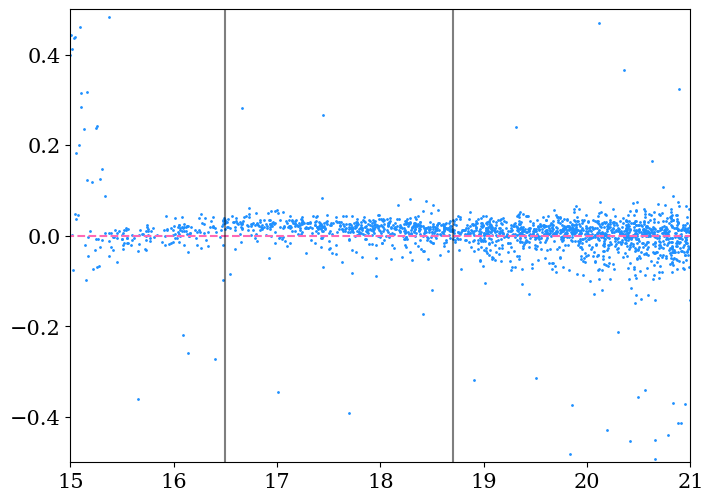

In [7]:
fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

ax.scatter(mag_g,mag_ag-mag_g,c = 'dodgerblue', s=1)
ax.set_xlim(15,21)
ax.set_ylim(-0.5,0.5)
ax.hlines(0,14,22, linestyle = 'dashed', color ='hotpink')
ax.vlines(16.5,-2,2,alpha =0.5)
ax.vlines(18.7,-2,2,alpha =0.5)
plt.show()

In [8]:
fit_line = []


mask_g = (mag_g >= 16.5) & (mag_g <= 18.7) & (
    mag_ag-mag_g > -0.2) & (mag_ag-mag_g < 0.2)
g_dfs = dfs[mask_g]

magnsf_g = g_dfs['MAG_AUTO_g_1']
magnoao_g = g_dfs['mag_auto_g_2']
diff_g = magnoao_g-magnsf_g



popt_g, pcov = curve_fit(func, magnsf_g, diff_g)
fit_line.append(popt_g)
print(popt_g)

[0.01484103]


## R

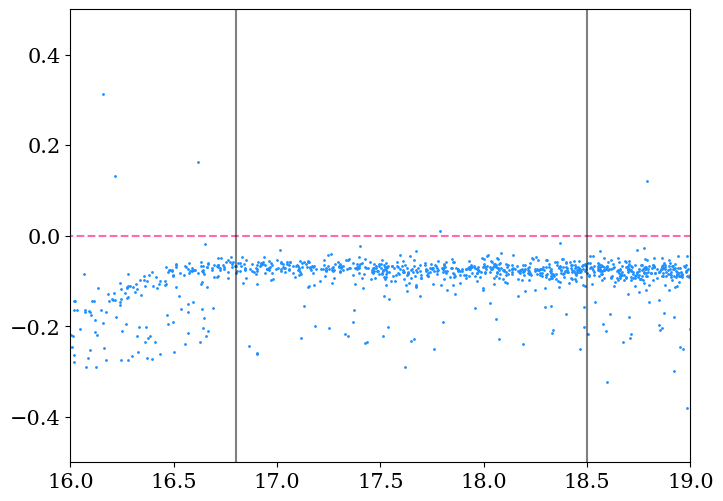

In [9]:
fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

ax.scatter(mag_r,mag_ar-mag_r,c = 'dodgerblue', s=1)
ax.set_xlim(16,19)
ax.set_ylim(-0.5,0.5)
ax.hlines(0,14,22, linestyle = 'dashed', color ='hotpink')
ax.vlines(16.8,-2,2,alpha =0.5)
ax.vlines(18.5,-2,2,alpha =0.5)
plt.show()

In [10]:
mask_r = (mag_r >= 16.8) & (mag_r <= 18.5) & (
    mag_ar-mag_r > -0.2) & (mag_ar-mag_r < 0.2)
r_dfs = dfs[mask_r]

magnsf_r = r_dfs['MAG_AUTO_r_1']
magnoao_r = r_dfs['mag_auto_r_2']
diff_r = magnoao_r-magnsf_r



popt_r, pcov = curve_fit(func, magnsf_r, diff_r)
fit_line.append(popt_r)
print(popt_r)

[-0.07719921]


## I

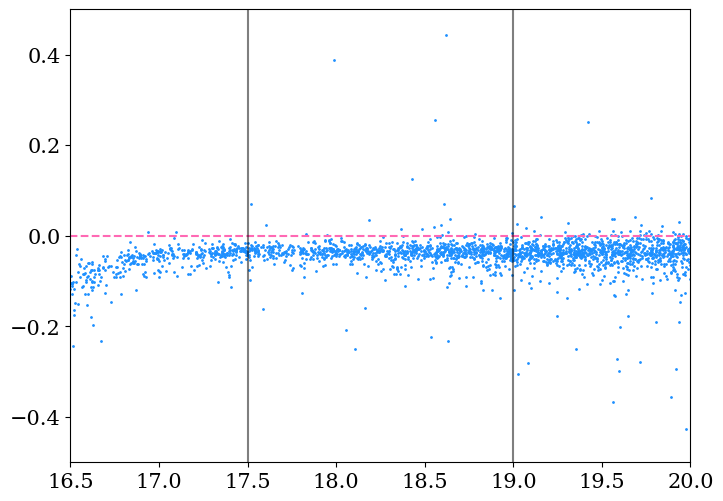

In [11]:
fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

ax.scatter(mag_i,mag_ai-mag_i,c = 'dodgerblue', s=1)
ax.set_xlim(16.5,20)
ax.set_ylim(-0.5,0.5)
ax.hlines(0,14,22, linestyle = 'dashed', color ='hotpink')
ax.vlines(17.5,-2,2,alpha =0.5)
ax.vlines(19,-2,2,alpha =0.5)
plt.show()

In [12]:
mask_i = (mag_i >= 17.5) & (mag_i <= 19) & (
    mag_ai-mag_i > -0.2) & (mag_ai-mag_i < 0.2)
i_dfs = dfs[mask_i]

magnsf_i = i_dfs['MAG_AUTO_i_1']
magnoao_i = i_dfs['mag_auto_i_2']
diff_i = magnoao_i-magnsf_i



popt_i, pcov = curve_fit(func, magnsf_i, diff_i)
fit_line.append(popt_i)
print(popt_i)

[-0.0374649]


## Z

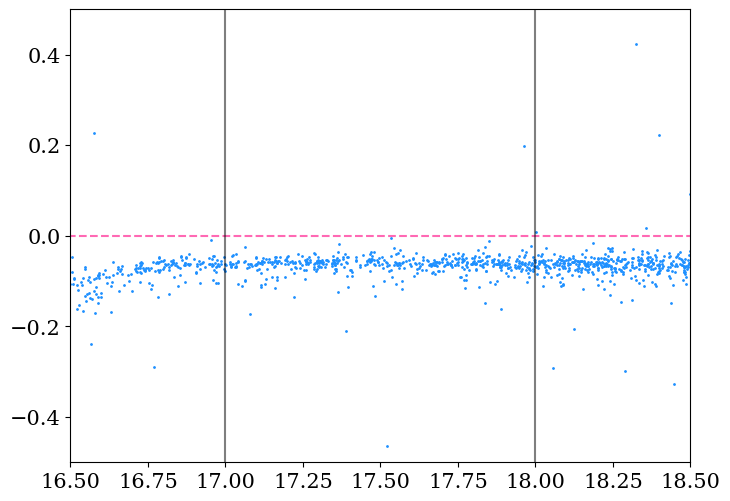

In [13]:
fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

ax.scatter(mag_z,mag_az-mag_z,c = 'dodgerblue', s=1)
ax.set_xlim(16.5,18.5)
ax.set_ylim(-0.5,0.5)
ax.hlines(0,14,22, linestyle = 'dashed', color ='hotpink')
ax.vlines(17,-2,2,alpha =0.5)
ax.vlines(18,-2,2,alpha =0.5)
plt.show()

In [14]:
mask_z = (mag_z >= 16.5) & (mag_z <= 18.7) & (
    mag_az-mag_z > -0.2) & (mag_az-mag_z < 0.2)
z_dfs = dfs[mask_z]

magnsf_z = z_dfs['MAG_AUTO_z_1']
magnoao_z = z_dfs['mag_auto_z_2']
diff_z = magnoao_z-magnsf_z



popt_z, pcov = curve_fit(func, magnsf_z, diff_z)
fit_line.append(popt_z)
print(popt_z)

[-0.06660824]


## Y

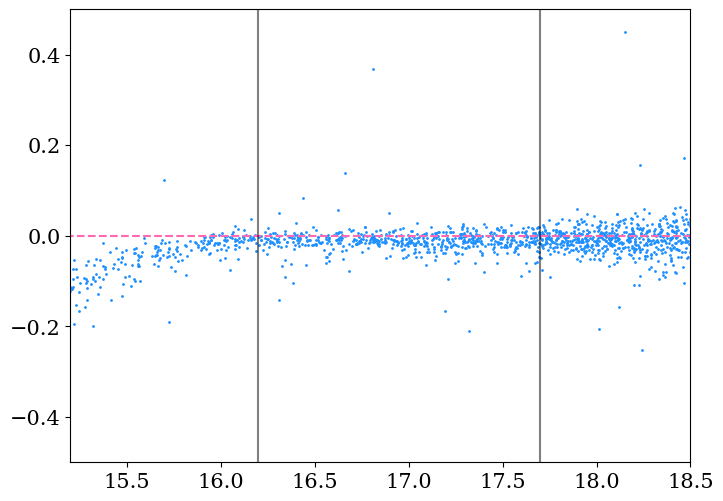

In [15]:
fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

ax.scatter(mag_y,mag_ay-mag_y,c = 'dodgerblue', s=1)
ax.set_xlim(15.2,18.5)
ax.set_ylim(-0.5,0.5)
ax.hlines(0,14,22, linestyle = 'dashed', color ='hotpink')
ax.vlines(16.2,-2,2,alpha =0.5)
ax.vlines(17.7,-2,2,alpha =0.5)
plt.show()

In [16]:
mask_y = (mag_y >= 16.5) & (mag_y <= 18.7) & (
    mag_ay-mag_y > -0.2) & (mag_ay-mag_y < 0.2)
y_dfs = dfs[mask_y]

magnsf_y = y_dfs['MAG_AUTO_y_1']
magnoao_y = y_dfs['mag_auto_y_2']
diff_y = magnoao_y-magnsf_y



popt_y, pcov = curve_fit(func, magnsf_y, diff_y)
fit_line.append(popt_y)
print(popt_y)

[-0.00926503]


## NB

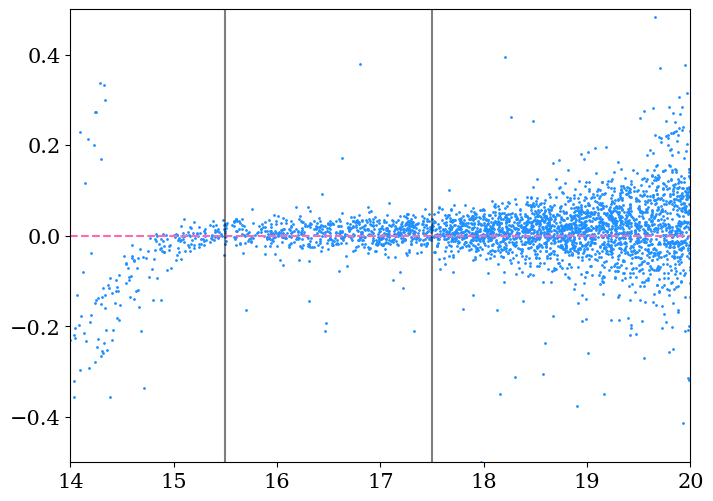

In [17]:
fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

ax.scatter(mag_NB,mag_ay-mag_NB,c = 'dodgerblue', s=1)
ax.set_xlim(14,20)
ax.set_ylim(-0.5,0.5)
ax.hlines(0,14,22, linestyle = 'dashed', color ='hotpink')
ax.vlines(15.5,-2,2,alpha =0.5)
ax.vlines(17.5,-2,2,alpha =0.5)
plt.show()

In [18]:
mask_NB = (mag_NB >= 15.5) & (mag_NB <= 17.5) & (
    mag_ay-mag_NB > -0.1) & (mag_ay-mag_NB < 0.1)
NB_dfs = dfs[mask_NB]

magnsf_NB = NB_dfs['MAG_AUTO']
magnoao_NB = NB_dfs['mag_auto_y_2']
diff_NB = magnoao_NB - magnsf_NB



popt_NB, pcov = curve_fit(func, magnsf_NB, diff_NB)
fit_line.append(popt_NB)
print(popt_NB)

[0.00694855]


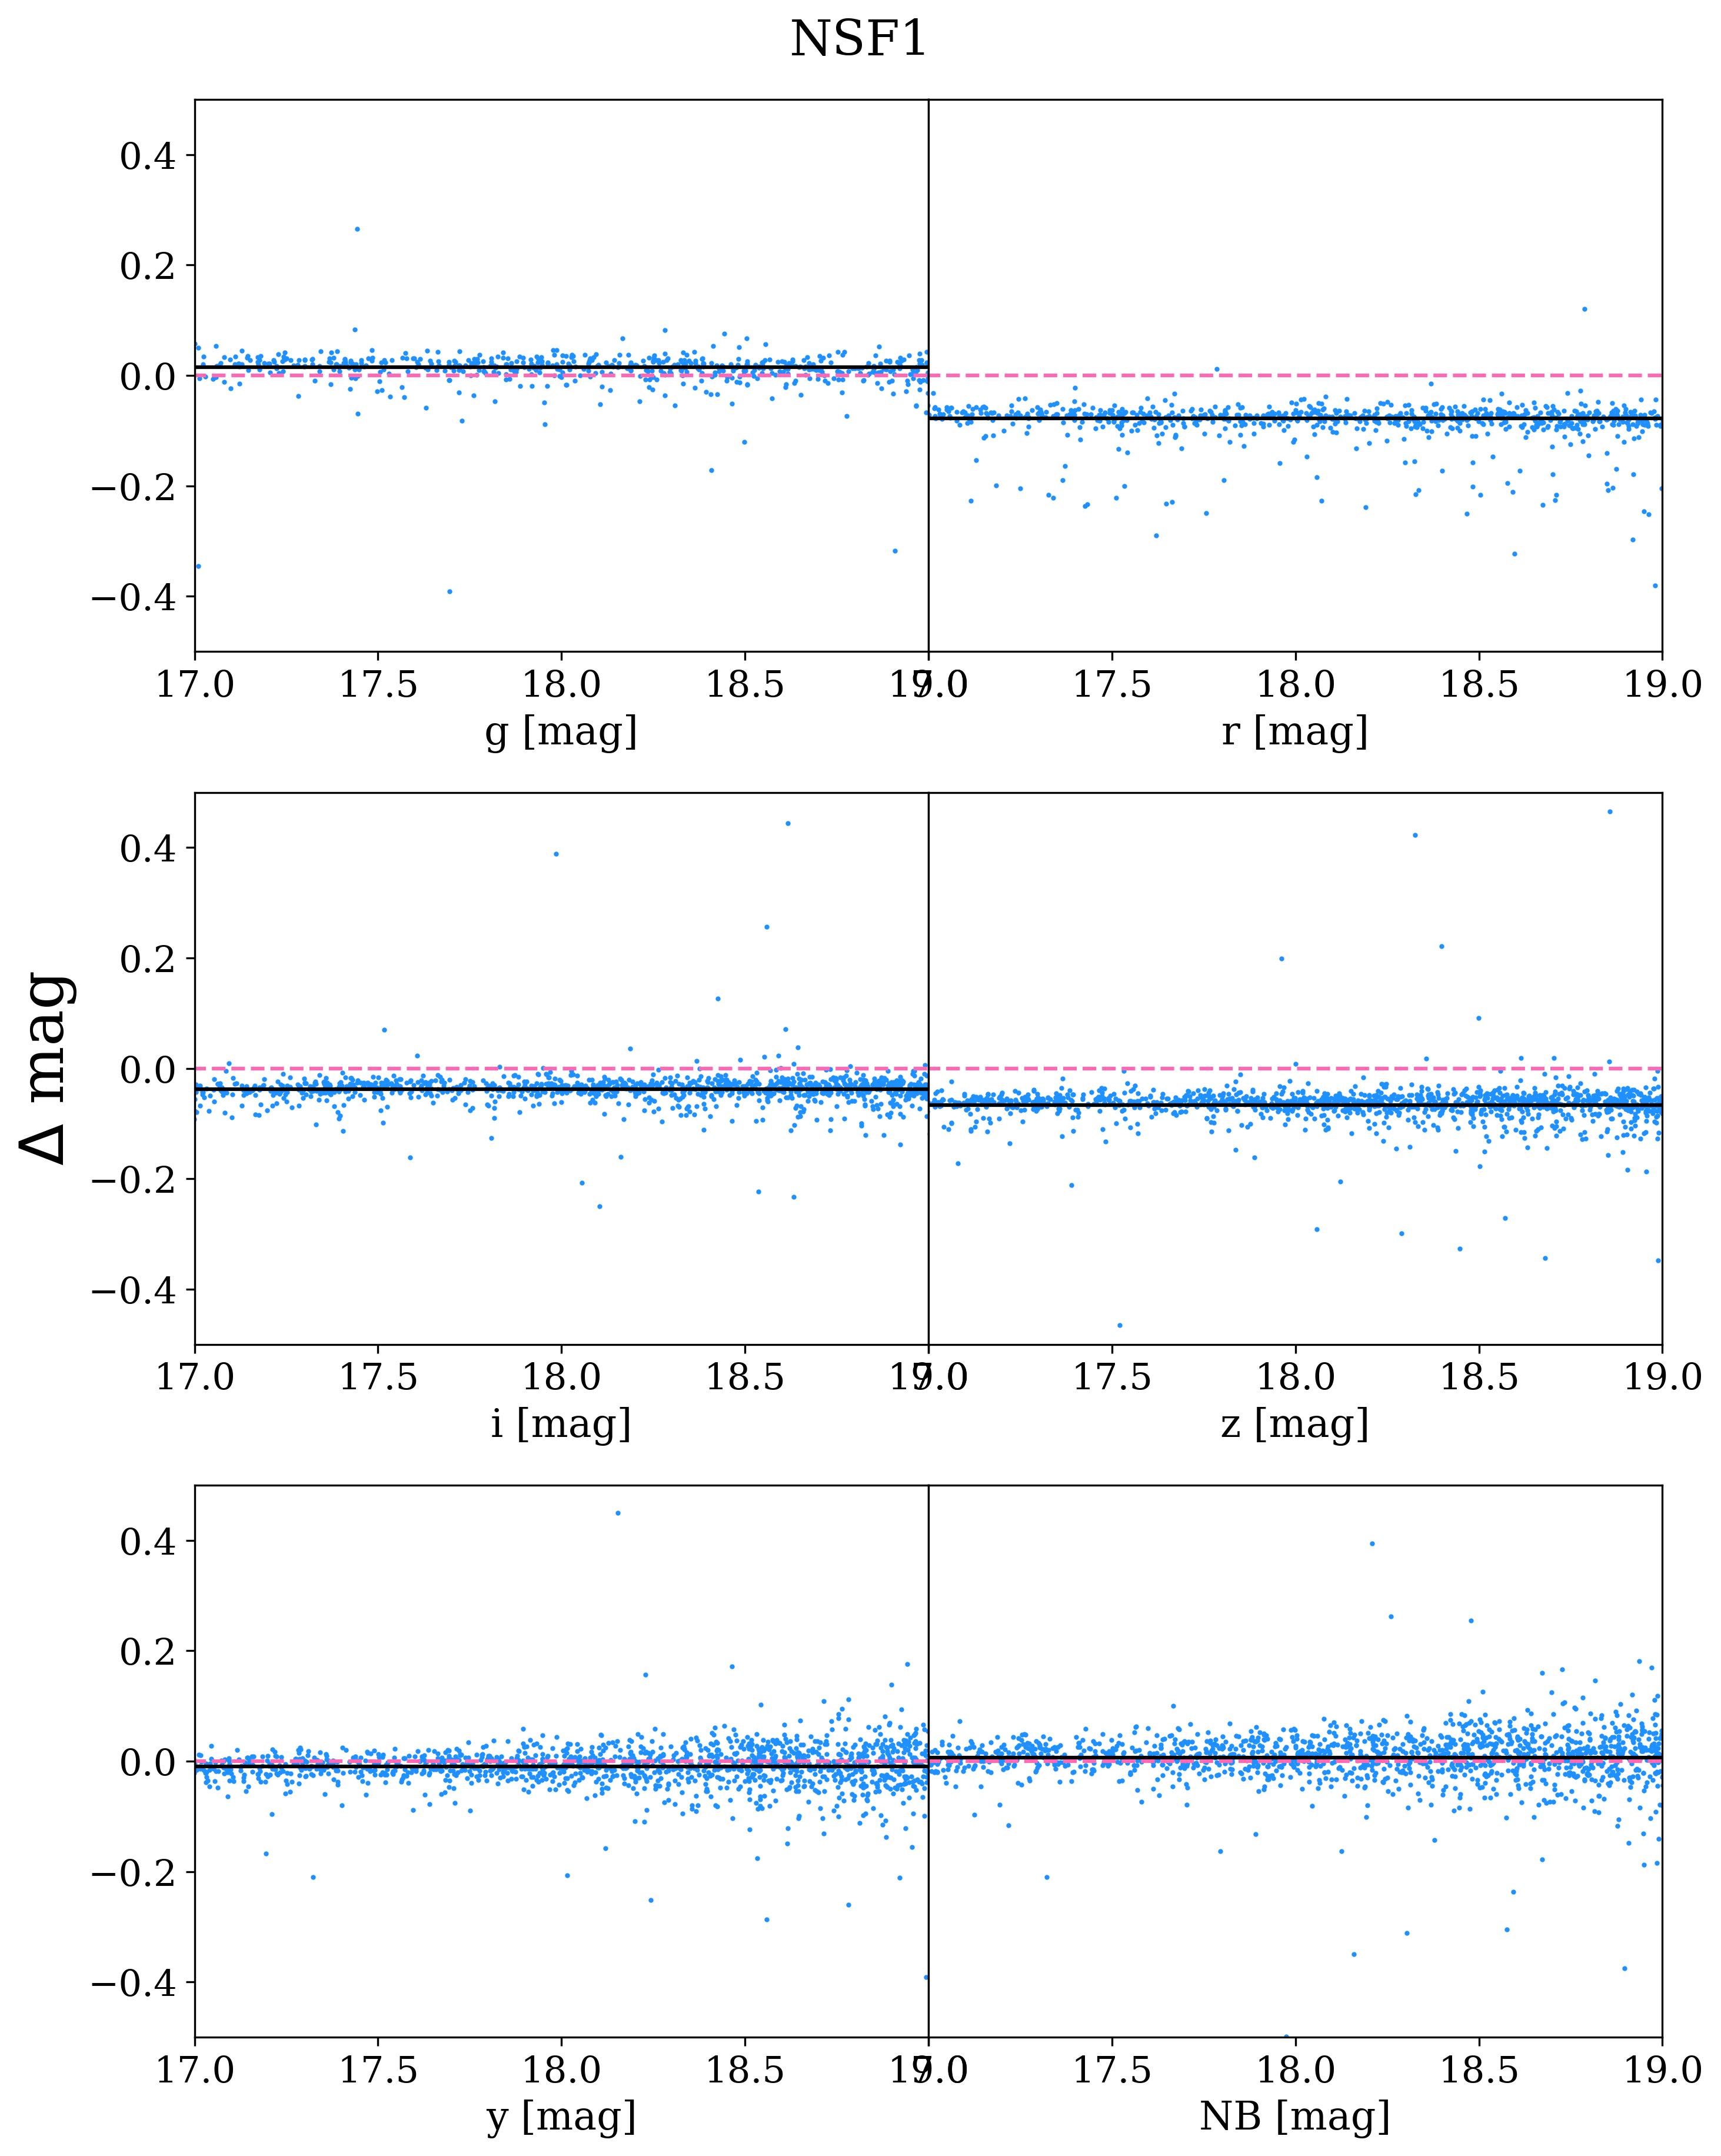

In [19]:
fig,ax=plt.subplots(ncols =2, nrows =3,figsize=(10,12),facecolor= 'w', dpi=300)

for i, mag in enumerate(mag_nsf):
    #mask = mag < 40
    ax[i//2][i-2*(i//2)].scatter(mag_nsf[i],mag_noao[i]-mag_nsf[i], color = 'dodgerblue', s= 1)
    #ax.hist(np.log10(dist_star), bins = 20 , color = 'mediumslateblue',  label = 'Estrellas', ec = 'white')
    #ax[i//2][i-2*(i//2)].set_title(nombres[i], size = 16)
    ax[i//2][i-2*(i//2)].set_xlabel(f'{nombres[i]} [mag]', size = 16)
    ax[i//2][i-2*(i//2)].hlines(fit_line[i],12,26)
    ax[1][0].set_ylabel(r'$\Delta$ mag', size = 25)
    ax[i//2][i-2*(i//2)].set_xlim(17,19)
    ax[i//2][i-2*(i//2)].set_ylim(-0.5,0.5)
    ax[i//2][i-2*(i//2)].hlines(0,0,100, linestyles = 'dashed', color = 'hotpink')
    if i in [1,3,5]:
        ax[i//2][i-2*(i//2)].set_yticks([])
        ax[i//2][i-2*(i//2)].set_ylabel('')
        
#     if i in [0,1,2]:
#         ax[i//2][i-2*(i//2)].set_xticks([])
#         ax[i//2][i-2*(i//2)].set_xlabel('')
    #ax.grid(True, ls = ':')
    #ax[i//2][i-2*(i//2)].legend(fontsize = 15, loc=2)
    #ax[2,1].set_axis_off()
    

fig.tight_layout()    
plt.subplots_adjust(wspace=0)
plt.suptitle('NSF1', fontsize = 20, y = 1.02)
plt.show()

## Aply offset

In [20]:
data = Table.read('NSF_catalog.fits')

In [21]:
key_cat = ['MAG_AUTO_g', 'MAG_AUTO_r', 'MAG_AUTO_i',
           'MAG_AUTO_z', 'MAG_AUTO_y', 'MAG_AUTO']
key_cat_b = ['MAG_APER_g', 'MAG_APER_r', 'MAG_APER_i',
             'MAG_APER_z', 'MAG_APER_y', 'MAG_APER']
for i in range(len(fit_line)):
    data[key_cat[i]] = data[key_cat[i]] + fit_line[i]
    data[key_cat_b[i]] = data[key_cat_b[i]] + fit_line[i]

In [22]:
aper = 2
BB = np.array([data['MAG_APER_y'][i][aper] for i in range(len(data))])

NB = np.array([data['MAG_APER'][i][aper] for i in range(len(data))])

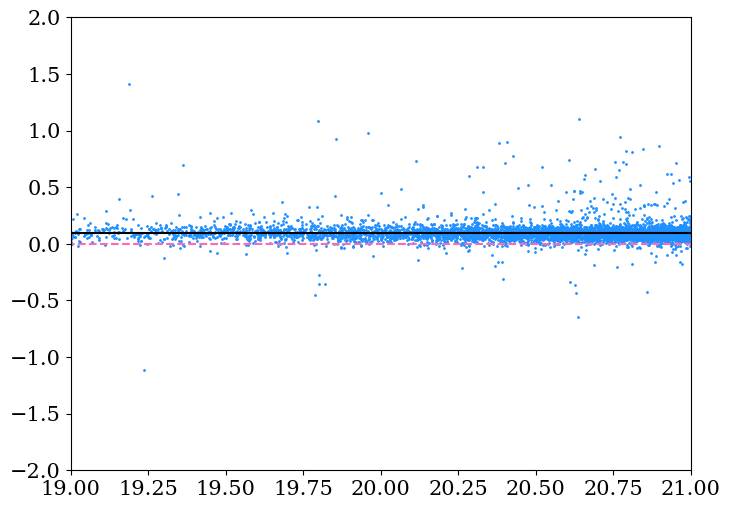

In [23]:
fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

ax.scatter(NB,BB-NB,c = 'dodgerblue', s=1)
#ax.plot(mags[:-numb], sigma_c, color = 'crimson')
#ax.plot(fp, a)

ax.set_xlim(19,21)
ax.set_ylim(-2,2)
ax.hlines(0,14,28, linestyle = 'dashed', color ='hotpink')
ax.hlines(0.09519527,14,28)

plt.show()

In [24]:
mask_cont = (NB >= 19) & (NB <= 21) & (
    BB-NB > 0) & (BB-NB < 0.25)
cont_dfs = data[mask_cont]

magNB_cont = np.array([cont_dfs['MAG_APER'][i][aper] for i in range(len(cont_dfs))])

magBB_cont = np.array([cont_dfs['MAG_APER_y'][i][aper] for i in range(len(cont_dfs))])

diff_cont = magBB_cont-magNB_cont

ew_end = 0.44

NB_5s = 24.98 

popt_new, pcov = curve_fit(func, NB, diff_cont)
print(popt_new)

[0.09519527]


# Selection Criteria

In [25]:
NB_corr = (NB+popt_new)

In [26]:
%%time

Broadb = []
Narrowb = []
mask_clip = []
sig_clip = []
numbers = np.arange(np.min(NB_corr), np.max(NB_corr), 0.125)
# print(numbers)
for i, n in enumerate(numbers):
    # print(n)
    mask = (NB_corr >= n) & (NB_corr < n+0.125)
    BB_a = BB[mask]
    NB_a = NB_corr[mask]
    sig_c = sigma_clipped_stats((BB_a - NB_a), sigma=3, cenfunc='median')
    sig_clip.append(3*sig_c[2])
    # print(3*sig_c[2])
    for j in range(len(BB_a)):
        #print(BB_a)
        #if (np.around(BB_a[j]-NB_a[j], 3) > 3*sig_c[2]) & (NB_a[j] < NB_5s) & (np.around(BB_a[j]-NB_a[j], 3) > ew_end):
        if (np.around(BB_a[j]-NB_a[j]) == 3*sig_c[2]):
            Broadb.append(BB_a[j])
            Narrowb.append(NB_a[j])
            # print(NB_a[j])
            # print(BB_a[j]-NB_a[j])
            # print('Hola:'+str(np.around(BB_a[j]-NB_a[j],3)))
            mask_clip.append(True)
        else:
            mask_clip.append(False)

CPU times: user 8.08 s, sys: 147 ms, total: 8.23 s
Wall time: 8.22 s


In [27]:
from astroML.stats import binned_statistic_2d

mask_value =  ((BB -NB_corr)  > -25 ) & ((BB -NB_corr)  < 25 ) & (NB_corr < 30)
N, xedges, yedges = binned_statistic_2d(NB_corr[mask_value], (BB[mask_value]-NB_corr[mask_value]), NB_corr[mask_value],
                                        'count', bins=700)

/home/pvfort/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


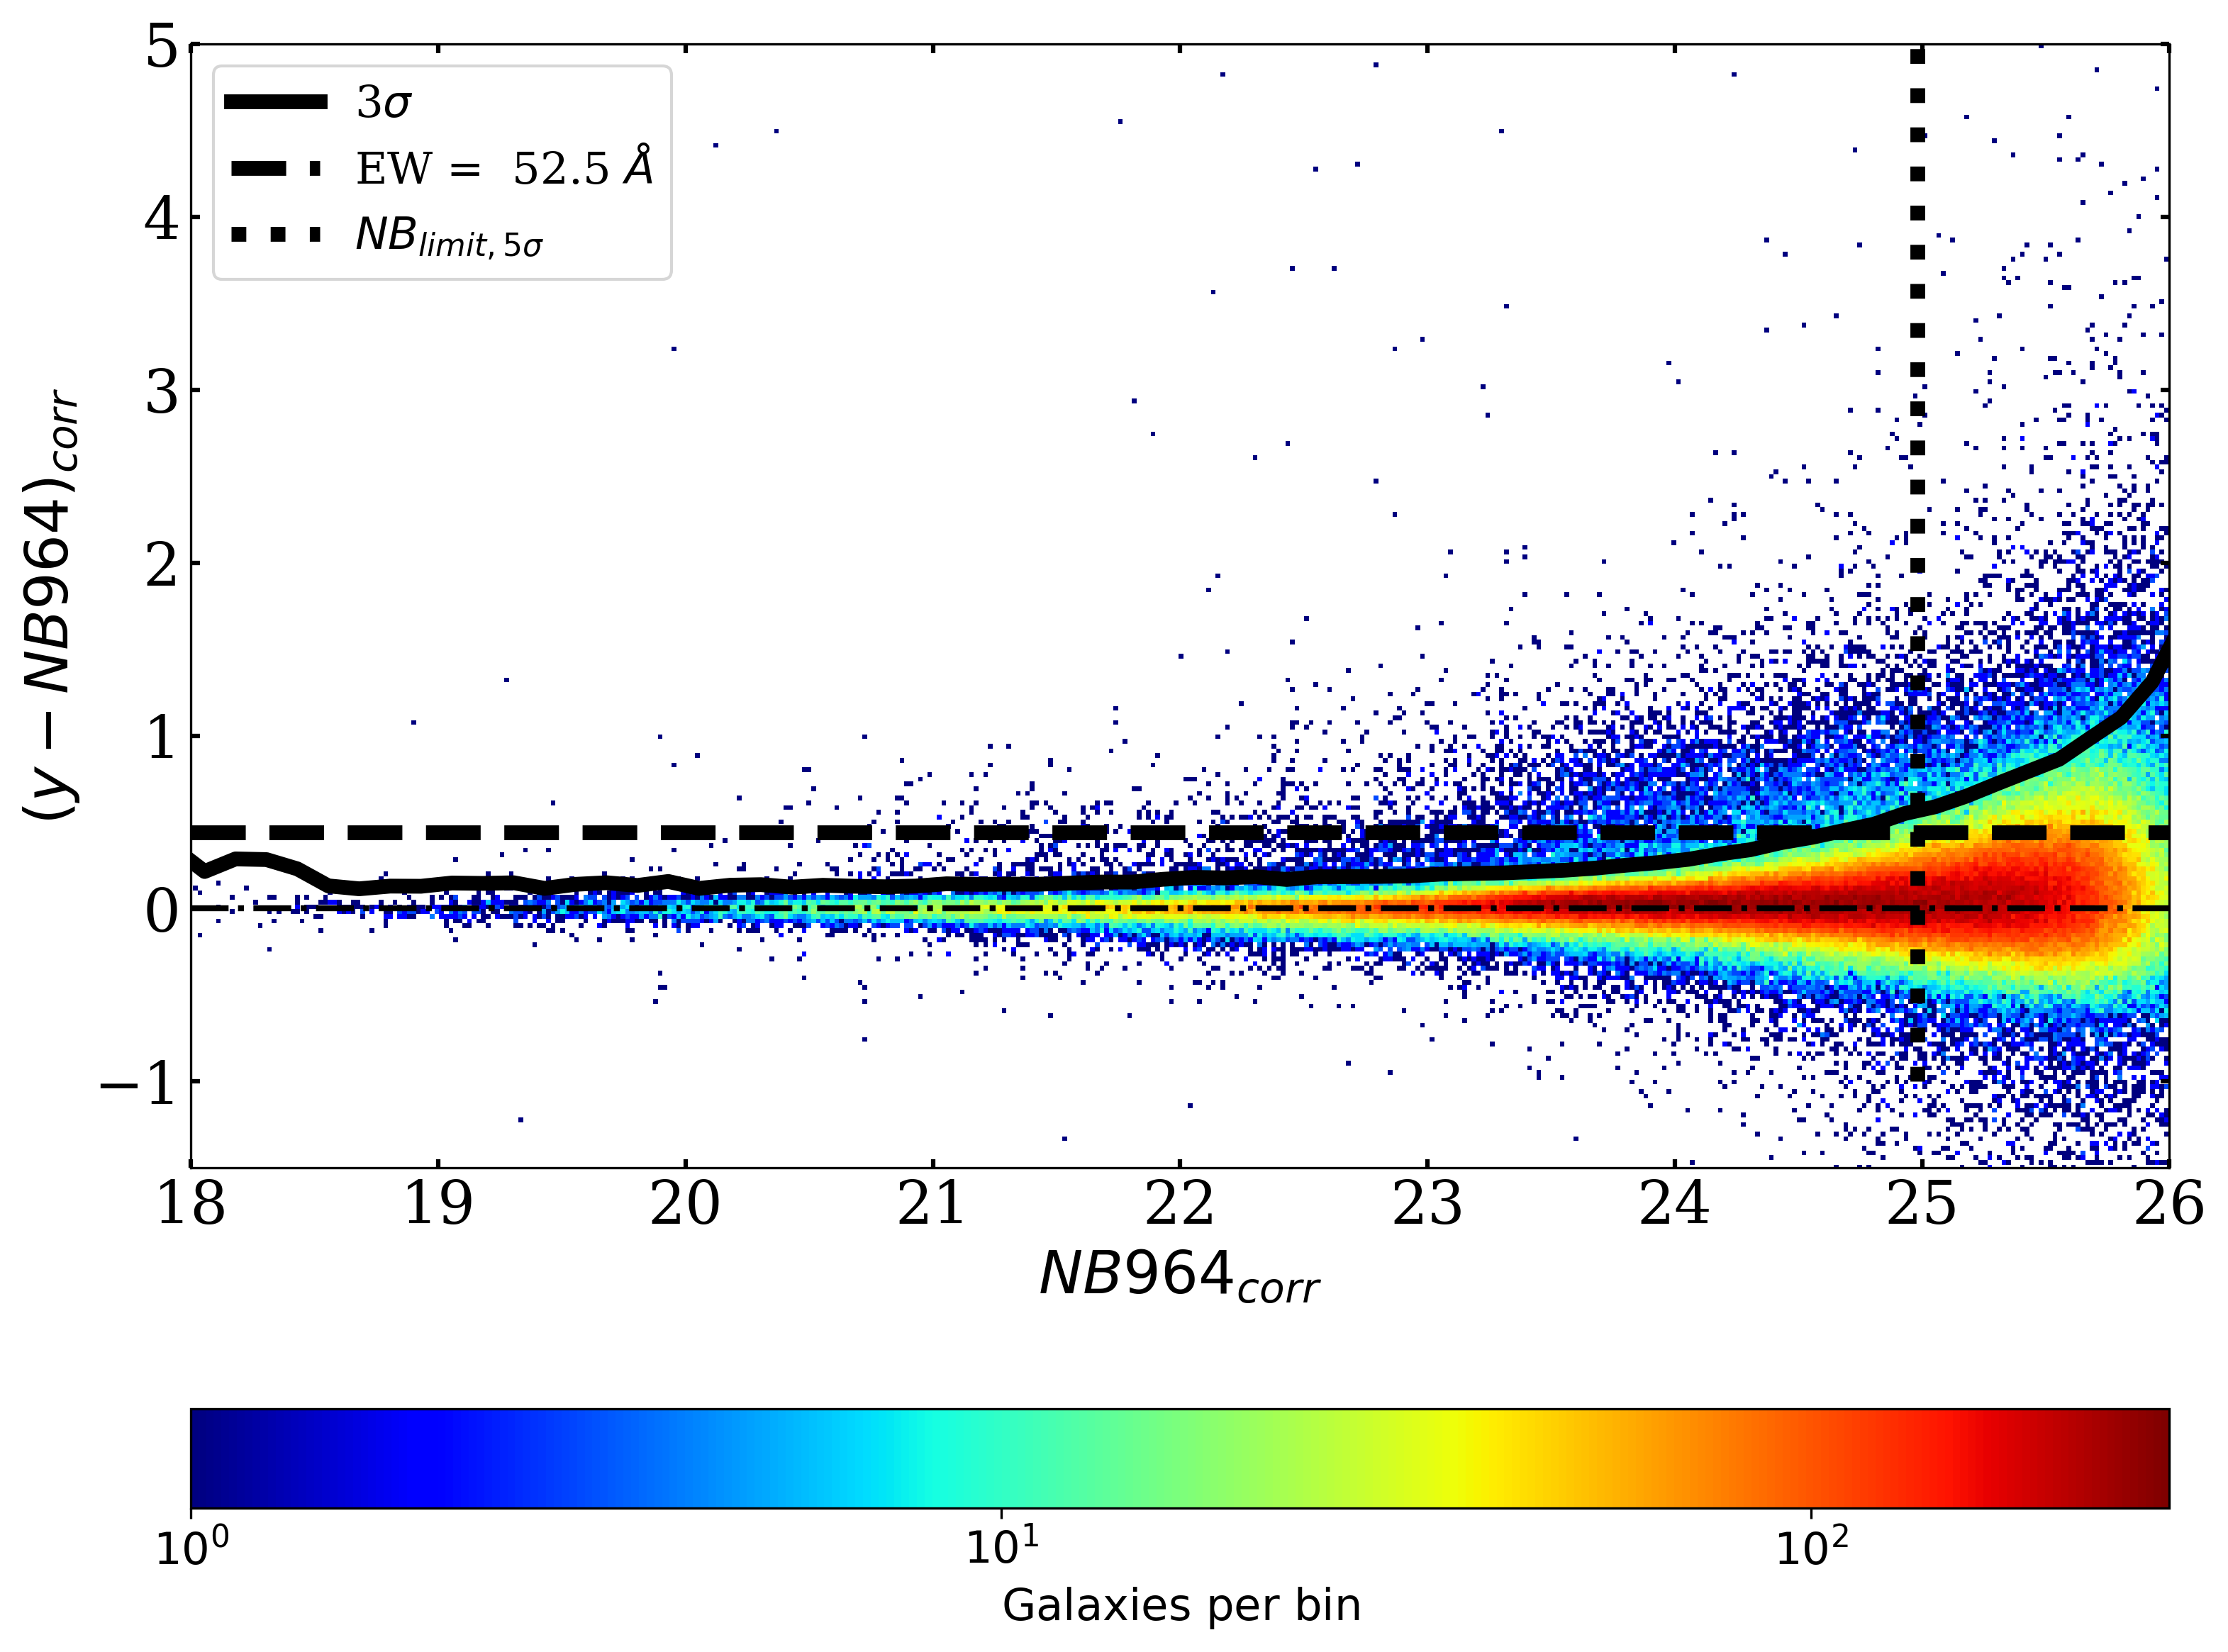

In [56]:
cmap = plt.cm.jet
cmap.set_bad('w', 1.)

cmap_multicolor = plt.cm.jet
cmap_multicolor.set_bad('w', 1.)

fig = plt.figure(figsize=(12, 10), dpi = 300)
#--------------------
# First axes:
plt.imshow(np.log10(N.T), origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap='jet')


cb = plt.colorbar(ticks=[0, 1, 2, 3],
                  format=r'$10^{%i}$', orientation='horizontal')
cb.set_label(r'$\mathrm{Galaxies\ per\ bin}$', size = 15)


# #ax.hlines(0,18,27, linestyle='dotted', color ='hotpink')
plt.hlines(ew_end,18,27, linestyle='dashed', color ='k', linewidth = 5, label = r'EW =  52.5 $\AA$')
plt.hlines(0,18,27, linestyle='-.', color ='k', linewidth = 2)
plt.vlines(NB_5s,-1,5, linestyle='dotted', color ='k', linewidth = 5, label = r'$NB_{limit,5\sigma}$')
plt.plot(numbers,sig_clip, color = 'k', linewidth = 5, label = '3$\sigma$')


plt.tick_params(axis='x', which='both', bottom=True, top=True, direction='in', length=6)   # Ticks en el eje x en la parte inferior y superior
plt.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', length=3)
plt.tick_params(axis='y', which='both', left=True, right=True, direction='in', length=6)   # Ticks en el eje y en el lado izquierdo y derecho
plt.tick_params(axis='y', which='minor', bottom=True, top=True, direction='in', length=3)



plt.tick_params(direction = 'in', length = 3, width = 1.5, colors = 'k', labelsize = 20)

plt.ylabel(r'$(y - NB964)_{corr}$')
plt.xlabel(r'$NB964_{corr}$')

plt.legend(loc = 2)

plt.xlim(18,26) 
plt.ylim(-1.5,5)
plt.show()

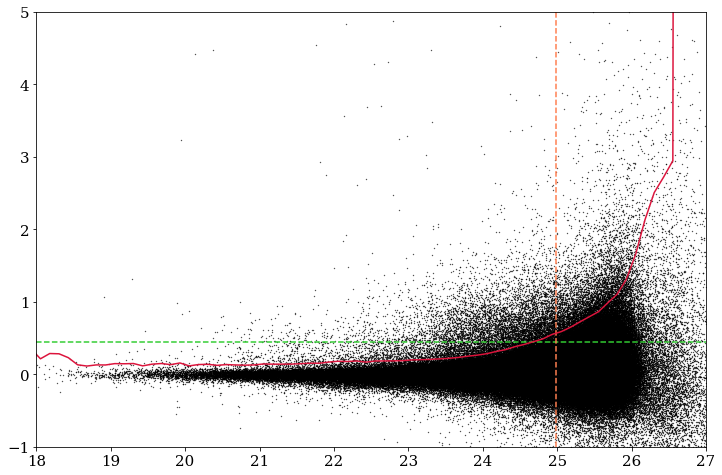

In [29]:
fig, ax= plt.subplots(figsize =(12,8))

ax.scatter(NB_corr, BB-NB_corr, s =0.1, color ='k')
#ax.scatter(np.array(Narrowb), np.array(Broadb)-np.array(Narrowb), s =1, color ='royalblue')
#ax.plot(mags[:-numb], sigma_c, color = 'crimson',alpha =0.8)
# ax.scatter(NB_cc,BB_cc-NB_cc,s=1)
ax.plot(numbers,sig_clip, color = 'crimson')
#.plot(numbers,cs_crit, color = 'cyan')
ax.set_xlim(18,27) 
ax.set_ylim(-1,5)
#ax.hlines(0,18,27, linestyle='dotted', color ='hotpink')
ax.hlines(ew_end,18,27, linestyle='dashed', color ='limegreen')
ax.vlines(NB_5s,-1,5, linestyle='dashed', color ='coral')
plt.show()

In [30]:
mask_ = (NB_corr < NB_5s) & ((BB-NB_corr) > ew_end)
data_ = data[mask_]

In [31]:
data_

NUMBER,FLUX_ISO,FLUXERR_ISO,MAG_ISO,MAGERR_ISO,FLUX_APER [13],FLUXERR_APER [13],MAGERR_APER [13],MAG_APER [13],FLUX_AUTO,FLUXERR_AUTO,MAG_AUTO,MAGERR_AUTO,BACKGROUND,ALPHAPEAK_J2000,DELTAPEAK_J2000,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,FLAGS,ELONGATION,ELLIPTICITY,CLASS_STAR,FLUX_RADIUS,SNR_WIN,MAG_APER_g [13],FLUX_APER_g [13],FLUXERR_APER_g [13],MAGERR_APER_g [13],MAGERR_AUTO_g,BACKGROUND_g,MAG_AUTO_g,MAG_APER_r [13],FLUX_APER_r [13],FLUXERR_APER_r [13],MAGERR_APER_r [13],MAGERR_AUTO_r,BACKGROUND_r,MAG_AUTO_r,MAG_APER_i [13],FLUX_APER_i [13],FLUXERR_APER_i [13],MAGERR_APER_i [13],MAGERR_AUTO_i,BACKGROUND_i,MAG_AUTO_i,MAG_APER_z [13],FLUX_APER_z [13],FLUXERR_APER_z [13],MAGERR_APER_z [13],MAGERR_AUTO_z,BACKGROUND_z,MAG_AUTO_z,MAG_APER_y [13],FLUX_APER_y [13],FLUXERR_APER_y [13],MAGERR_APER_y [13],MAGERR_AUTO_y,BACKGROUND_y,MAG_AUTO_y
int32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,float64,float32,float32,float64,float64,float32,float32,float64,float64,int16,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float64
3878,11.963887,1.2829088,24.305319,0.1164537,6.7228622 .. 17.692585,0.915914 .. 6.213223,0.14795522 .. 0.38137785,24.938062748004153 .. 23.8874703255188,19.706995,3.388045,23.77039726643677,0.18670614,0.030198371,317.5329347563447,-67.01163908914062,13290.17,2704.835,317.53290241740956,-67.01165157038295,0,1.0713699,0.06661552,0.4080269,1.8508512,10.488956,26.957590056729867 .. 99.01484103329237,1.054145 .. -0.07813989,0.40478793 .. 2.6210616,0.41702017 .. 99.0,0.63787985,0.00855045,26.032432509732796,26.579937708964803 .. 24.680546534648396,1.3713408 .. 7.886813,0.45213702 .. 2.9106936,0.3580589 .. 0.4007973,0.19960454,0.015517189,24.56038547812984,25.645323952624917 .. 24.345872124621987,3.3642225 .. 11.134352,0.24942209 .. 1.6505933,0.08051559 .. 0.16099225,0.07109772,0.008574082,24.101317604968667,25.395210453789495 .. 23.87992686919477,4.1235595 .. 16.648928,0.36139932 .. 2.374727,0.09517982 .. 0.15490207,0.088135295,0.008658299,23.904756733696722,26.05999652378491 .. 98.99073497288158,2.3566523 .. -5.9603057,1.0494086 .. 6.9912453,0.48359177 .. 99.0,1.8379456,-0.0590554,26.100575365947996
3882,6.2544875,0.93358487,25.009521,0.16210331,5.0350327 .. 3.11246,0.8739405 .. 5.929208,0.18849915 .. 2.0688202,25.25194366841431 .. 25.7741890755188,12.122931,2.8249235,24.29792984395142,0.25306314,0.0019576224,317.54003396107623,-67.01139081156433,13253.508,2708.1035,317.5399362880939,-67.01138337017262,0,1.3543978,0.2616645,0.483117,1.7034888,7.279309,26.99622721798475 .. 25.11733431942518,1.0172925 .. 5.7412,0.38309282 .. 2.5428483,0.40896675 .. 0.4810028,0.30951428,0.008414527,25.425424529386117,26.407435191264607 .. 24.751612437358357,1.6074817 .. 7.387123,0.4352855 .. 2.830797,0.29407492 .. 0.41616273,0.20652968,0.012650939,24.749726069560506,25.62952538389933 .. 24.29714699644816,3.413533 .. 11.645413,0.24553393 .. 1.6413819,0.07811551 .. 0.15306805,0.07946393,-0.003258963,24.37822838682902,25.877115437310003 .. 24.70502872161176,2.6455183 .. 7.7865553,0.3495245 .. 2.3415992,0.14348175 .. 0.3265856,0.118453994,-0.004988281,24.396145054619574,26.2654751919978 .. 98.99073497288158,1.9503103 .. -7.896412,1.0273982 .. 6.8866935,0.5720907 .. 99.0,1.3732941,-0.05739505,25.944596209453856
4034,27.845892,1.8776053,23.388098,0.073227294,8.3005085 .. 17.92506,0.8128805 .. 5.4786286,0.106353514 .. 0.3319258,24.70918663411255 .. 23.873296817828372,16.354916,5.9053755,23.972827991534427,0.39212906,0.09549639,318.0187646109669,-67.00743734197788,10758.22,2730.374,318.0189132597405,-67.00740835798325,0,1.3636,0.2666471,0.43226537,1.4077643,15.40784,26.70902438290174 .. 24.653760863614632,1.3253391 .. 8.798979,0.2602904 .. 1.7128357,0.2

In [32]:
BB_ = np.array([data_['MAG_APER_y'][i][aper] for i in range(len(data_))])

NB_ = np.array([data_['MAG_APER'][i][aper] for i in range(len(data_))]) +popt_new

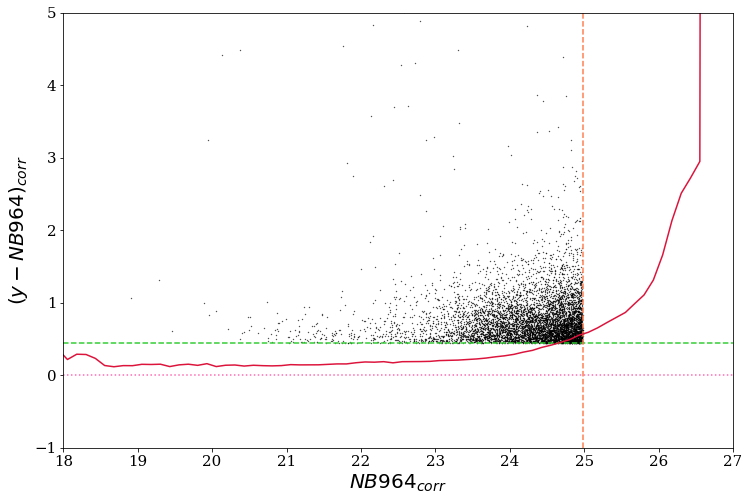

In [33]:
fig, ax= plt.subplots(figsize =(12,8))

#ax.scatter(NB, 3*cc_crit, color = 'k',alpha =0.8)
#ax.scatter(NB_corr, -(BB-NB_corr), s =1, color ='slategray')
ax.scatter(NB_, BB_-NB_, s =0.1, color ='k')
#ax.scatter(np.array(Narrowb), np.array(Broadb)-np.array(Narrowb), s =1, color ='royalblue')
#ax.plot(mags[:-numb], sigma_c, color = 'crimson',alpha =0.8)
# ax.scatter(NB_cc,BB_cc-NB_cc,s=1)
ax.plot(numbers,sig_clip, color = 'crimson')
#.plot(numbers,cs_crit, color = 'cyan')
ax.set_ylabel(r'$(y - NB964)_{corr}$')
ax.set_xlabel(r'$NB964_{corr}$')
ax.set_xlim(18,27) 
ax.set_ylim(-1,5)
ax.hlines(0,18,27, linestyle='dotted', color ='hotpink')
ax.hlines(0.44,18,27, linestyle='dashed', color ='limegreen')
ax.vlines(NB_5s,-1,5, linestyle='dashed', color ='coral')
plt.show()

In [34]:
from scipy.interpolate import interp1d

f = interp1d(numbers, sig_clip)

mask_curve = (BB_ - NB_) > f(NB_)

In [35]:
NB_c = NB_[mask_curve]

BB_c = BB_[mask_curve]

data_c = data_[mask_curve]

In [36]:
len(data_c)

6523

In [37]:
len(NB_)-len(NB_c)

457

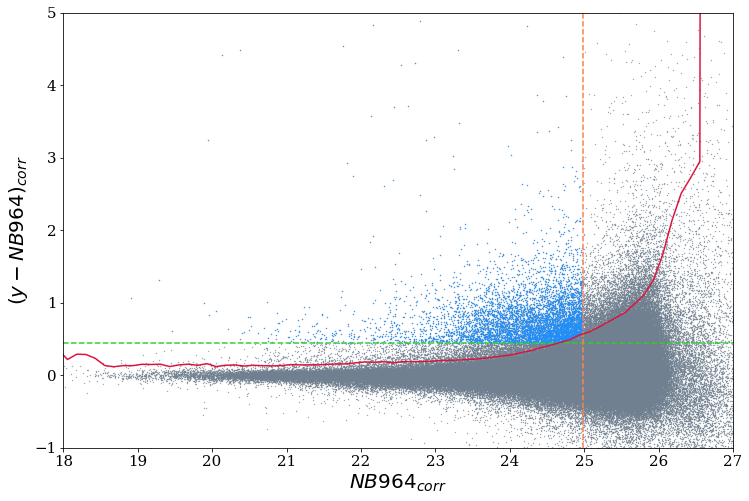

In [38]:
fig, ax= plt.subplots(figsize =(12,8))


#ax.scatter(NB, 3*cc_crit, color = 'k',alpha =0.8)
#ax.scatter(NB_corr, -(BB-NB_corr), s =1, color ='slategray')
ax.scatter(NB_corr, BB-NB_corr, s = 0.1, color = 'slategray')
ax.scatter(NB_c, BB_c-NB_c, s =0.1, color ='dodgerblue')
#ax.scatter(np.array(Narrowb), np.array(Broadb)-np.array(Narrowb), s =1, color ='royalblue')
#ax.plot(mags[:-numb], sigma_c, color = 'crimson',alpha =0.8)
# ax.scatter(NB_cc,BB_cc-NB_cc,s=1)
#ax.plot(NB_,f(NB_), color = 'crimson')
ax.plot(numbers,sig_clip, color = 'crimson')
ax.set_ylabel(r'$(y - NB964)_{corr}$')
ax.set_xlabel(r'$NB964_{corr}$')
ax.set_xlim(18,27) 
ax.set_ylim(-1,5)
#ax.hlines(0,18,27, linestyle='dotted', color ='hotpink')
ax.hlines(0.44,18,27, linestyle='dashed', color ='limegreen')
ax.vlines(NB_5s,-1,5, linestyle='dashed', color ='coral')
plt.show()

# SED

In [39]:
def cuts_mult(coords, data_filters, hdr_filters, names_filters, flux_filters, flux_errors, size, field):

    #data_filters = datag,datar,datai,dataz,datay, datanb
    #hdr_filters = hdrg, hdrr, hdri, hdrz, hdry, hdrnb
    # el path en el cual guardaremos las imágenes
    path = os.path.join('Cutouts', str(field))

    sigmac = []
    
                
    for j in range(len(data_filters)):        
        aper = random_apers(data_filters[j])
        sums = aper['aperture_sum']
        clipped = sigma_clipped_stats(sums, sigma=2)
        sigmac_ = clipped[2]
        sigmac.append(sigmac_)

    print(sigmac)
    names = get_names(coords)  # función amanda

    for i in range(len(coords)):

        path_N = os.path.join(path, names[i])

        fig, ax = plt.subplots(1, 6, figsize=(20, 8))

        for x, data in enumerate(data_filters):

                # nos retorna la desviación estandar que ocuparemos para que se vean bien los lya en los recortes
           # print(x,(x+1)//5, x-((x+1)//5 *5))
            m_wcs = WCS(hdr_filters[x])
            c = SkyCoord(coords[i][0], coords[i][1], frame=FK5, unit="deg")
            recorte = Cutout2D(
                data, c, (size*u.arcsec, size*u.arcsec), wcs=m_wcs)
            im = (recorte.data)
#ax[(x)//5, x-((x)//5 * 5)]
            ax[x].imshow(im, origin='lower', interpolation='nearest',
                                              cmap='Greys', vmin=-1*sigmac[x], vmax=3*sigmac[x])  # , norm = norm)
            ax[x].scatter((len(recorte.data)/2),len(recorte.data)/2-3, marker='|', color='red', s=300)
            ax[x].scatter((len(recorte.data)/2) -5, len(recorte.data)/2, marker='_', color='red', s=300)
            ax[x].set_title(names_filters[x], fontsize=18)
            ax[x].axis('off')

#         ax[1, 1].set_axis_off()
#         ax[1, 2].set_axis_off()
#         ax[1, 3].set_axis_off()
#         ax[1, 4].set_axis_off()

        #plt.savefig(path_N, transparent=False, facecolor='white')
        fig.tight_layout()
        plt.show()
        
        fig, ax= plt.subplots(figsize =(12,8))
        pivot = np.array([4770.80, 6371.30, 7774.20, 9157.90, 9640.00, 9886.30]) #g,r,i,z,NB,y,
        lines = np.array([flux_filters[j][i] for j in range(6)])
        err = np.array([flux_errors[j][i] for j in range(6)])
        #ax.errorbar(pivot[0], flux_filters[0][i], yerr=(errx,erry), fmt='.')
        
        for j, piv in enumerate(pivot):
            ax.errorbar(piv, lines[j], yerr = err[j], label = names_filters[j], fmt='o', capsize=2, ms=5, elinewidth=1)

        #ax.set_title(str(flux_filters[4][i]))
        ax.set_xlabel('Wavelength')
        ax.set_ylabel('Flux')
        
        ax.plot(pivot,lines, linestyle = 'dashed', color = 'slategray')
        plt.legend(loc =2)
        plt.show()
        # print(path_N)

    return

In [40]:
RA = data_c['ALPHA_J2000']
DEC = data_c['DELTA_J2000']

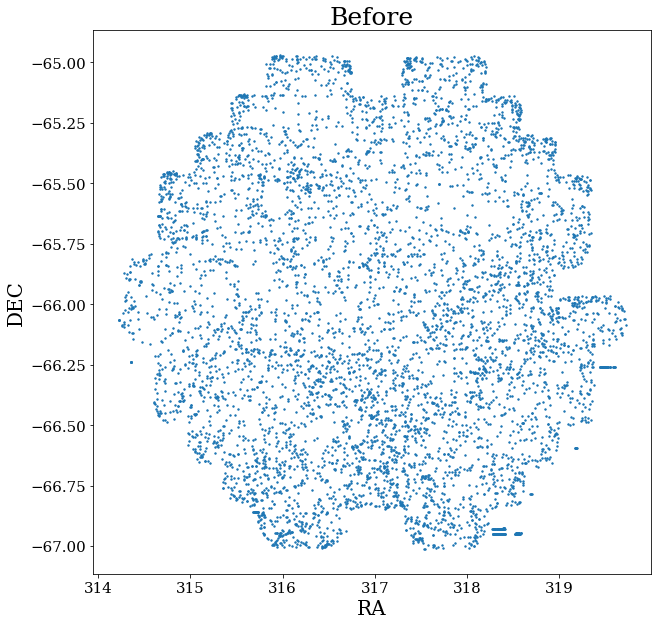

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(RA,DEC, s =2)

# ax.vlines(318.25,-66.9,-67)
# ax.hlines(-66.9,318.25,320)

# ax.vlines(318.65,-67,-65)
# ax.hlines(-66.7,314,320)

# ax.vlines(319.1,-67,-65)
# ax.hlines(-66.55,314,320)

# ax.vlines(319.4,-67,-65)
# ax.hlines(-66.2,314,320)

# ax.vlines(316.75,-67,-65)
# ax.vlines(316.68,-67,-65)
# ax.hlines(-66.9,314,320)

# ax.vlines(315.734,-67,-65)
# ax.hlines(-66.84,314,320)

# ax.vlines(314.24,-67,-65)
# ax.hlines(-66,314,320)

# ax.vlines(314.4,-67,-65)
# ax.hlines(-66.20,314,320)
ax.set_title('Before')
ax.set_xlabel('RA')
ax.set_ylabel('DEC')

plt.show()

In [42]:
cut1 = (RA > 318.25) & (DEC < -66.9) 
cut2 = (RA > 318.65) & (DEC < -66.7)
cut3 = (RA > 319.10) & (DEC < -66.55)
cut4 = (RA > 319.40) & (DEC < -66.2)

cut5 = (RA > 316.68) & (RA < 316.75) & (DEC < -66.9)
cut6 = (RA < 315.734) & (DEC < -66.84)
cut7 = (RA < 314.24) & (DEC < -66)
cut8 = (RA < 314.4) & (DEC < -66.20)

In [43]:
data_a = data_c[~cut1 & ~cut2 & ~cut3 & ~cut4 & ~cut5 & ~cut6 & ~cut7 & ~cut8]

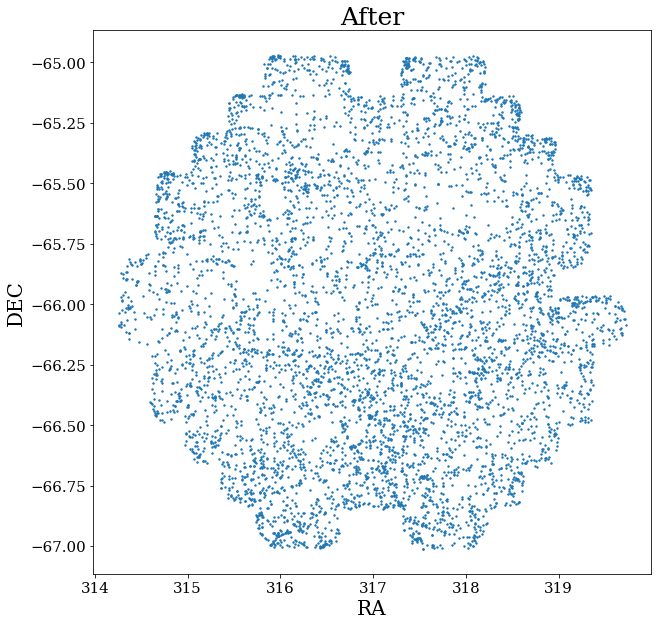

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data_a['ALPHA_J2000'],data_a['DELTA_J2000'], s =2)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.set_title('After')
plt.show()

In [45]:
data_a

NUMBER,FLUX_ISO,FLUXERR_ISO,MAG_ISO,MAGERR_ISO,FLUX_APER [13],FLUXERR_APER [13],MAGERR_APER [13],MAG_APER [13],FLUX_AUTO,FLUXERR_AUTO,MAG_AUTO,MAGERR_AUTO,BACKGROUND,ALPHAPEAK_J2000,DELTAPEAK_J2000,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,FLAGS,ELONGATION,ELLIPTICITY,CLASS_STAR,FLUX_RADIUS,SNR_WIN,MAG_APER_g [13],FLUX_APER_g [13],FLUXERR_APER_g [13],MAGERR_APER_g [13],MAGERR_AUTO_g,BACKGROUND_g,MAG_AUTO_g,MAG_APER_r [13],FLUX_APER_r [13],FLUXERR_APER_r [13],MAGERR_APER_r [13],MAGERR_AUTO_r,BACKGROUND_r,MAG_AUTO_r,MAG_APER_i [13],FLUX_APER_i [13],FLUXERR_APER_i [13],MAGERR_APER_i [13],MAGERR_AUTO_i,BACKGROUND_i,MAG_AUTO_i,MAG_APER_z [13],FLUX_APER_z [13],FLUXERR_APER_z [13],MAGERR_APER_z [13],MAGERR_AUTO_z,BACKGROUND_z,MAG_AUTO_z,MAG_APER_y [13],FLUX_APER_y [13],FLUXERR_APER_y [13],MAGERR_APER_y [13],MAGERR_AUTO_y,BACKGROUND_y,MAG_AUTO_y
int32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,float64,float32,float32,float64,float64,float32,float32,float64,float64,int16,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float64
3878,11.963887,1.2829088,24.305319,0.1164537,6.7228622 .. 17.692585,0.915914 .. 6.213223,0.14795522 .. 0.38137785,24.938062748004153 .. 23.8874703255188,19.706995,3.388045,23.77039726643677,0.18670614,0.030198371,317.5329347563447,-67.01163908914062,13290.17,2704.835,317.53290241740956,-67.01165157038295,0,1.0713699,0.06661552,0.4080269,1.8508512,10.488956,26.957590056729867 .. 99.01484103329237,1.054145 .. -0.07813989,0.40478793 .. 2.6210616,0.41702017 .. 99.0,0.63787985,0.00855045,26.032432509732796,26.579937708964803 .. 24.680546534648396,1.3713408 .. 7.886813,0.45213702 .. 2.9106936,0.3580589 .. 0.4007973,0.19960454,0.015517189,24.56038547812984,25.645323952624917 .. 24.345872124621987,3.3642225 .. 11.134352,0.24942209 .. 1.6505933,0.08051559 .. 0.16099225,0.07109772,0.008574082,24.101317604968667,25.395210453789495 .. 23.87992686919477,4.1235595 .. 16.648928,0.36139932 .. 2.374727,0.09517982 .. 0.15490207,0.088135295,0.008658299,23.904756733696722,26.05999652378491 .. 98.99073497288158,2.3566523 .. -5.9603057,1.0494086 .. 6.9912453,0.48359177 .. 99.0,1.8379456,-0.0590554,26.100575365947996
3882,6.2544875,0.93358487,25.009521,0.16210331,5.0350327 .. 3.11246,0.8739405 .. 5.929208,0.18849915 .. 2.0688202,25.25194366841431 .. 25.7741890755188,12.122931,2.8249235,24.29792984395142,0.25306314,0.0019576224,317.54003396107623,-67.01139081156433,13253.508,2708.1035,317.5399362880939,-67.01138337017262,0,1.3543978,0.2616645,0.483117,1.7034888,7.279309,26.99622721798475 .. 25.11733431942518,1.0172925 .. 5.7412,0.38309282 .. 2.5428483,0.40896675 .. 0.4810028,0.30951428,0.008414527,25.425424529386117,26.407435191264607 .. 24.751612437358357,1.6074817 .. 7.387123,0.4352855 .. 2.830797,0.29407492 .. 0.41616273,0.20652968,0.012650939,24.749726069560506,25.62952538389933 .. 24.29714699644816,3.413533 .. 11.645413,0.24553393 .. 1.6413819,0.07811551 .. 0.15306805,0.07946393,-0.003258963,24.37822838682902,25.877115437310003 .. 24.70502872161176,2.6455183 .. 7.7865553,0.3495245 .. 2.3415992,0.14348175 .. 0.3265856,0.118453994,-0.004988281,24.396145054619574,26.2654751919978 .. 98.99073497288158,1.9503103 .. -7.896412,1.0273982 .. 6.8866935,0.5720907 .. 99.0,1.3732941,-0.05739505,25.944596209453856
4034,27.845892,1.8776053,23.388098,0.073227294,8.3005085 .. 17.92506,0.8128805 .. 5.4786286,0.106353514 .. 0.3319258,24.70918663411255 .. 23.873296817828372,16.354916,5.9053755,23.972827991534427,0.39212906,0.09549639,318.0187646109669,-67.00743734197788,10758.22,2730.374,318.0189132597405,-67.00740835798325,0,1.3636,0.2666471,0.43226537,1.4077643,15.40784,26.70902438290174 .. 24.653760863614632,1.3253391 .. 8.798979,0.2602904 .. 1.7128357,0.2

In [46]:
data_a.write('NSF_ELG_y.fits', format='fits', overwrite = True)

In [47]:
aper =2
g = np.array([data_a['FLUX_APER_g'][i][aper] for i in range(len(data_a))])

r = np.array([data_a['FLUX_APER_r'][i][aper] for i in range(len(data_a))])

i = np.array([data_a['FLUX_APER_i'][i][aper] for i in range(len(data_a))])

z = np.array([data_a['FLUX_APER_z'][i][aper] for i in range(len(data_a))])

y = np.array([data_a['FLUX_APER_y'][i][aper] for i in range(len(data_a))])

NB = np.array([data_a['FLUX_APER'][i][aper] for i in range(len(data_a))])

In [48]:
g_err = np.array([data_a['FLUXERR_APER_g'][i][aper] for i in range(len(data_a))])

r_err = np.array([data_a['FLUXERR_APER_r'][i][aper] for i in range(len(data_a))])

i_err = np.array([data_a['FLUXERR_APER_i'][i][aper] for i in range(len(data_a))])

z_err = np.array([data_a['FLUXERR_APER_z'][i][aper] for i in range(len(data_a))])

y_err = np.array([data_a['FLUXERR_APER_y'][i][aper] for i in range(len(data_a))])

NB_err = np.array([data_a['FLUXERR_APER'][i][aper] for i in range(len(data_a))])

In [49]:
NSF_NB = fits.open('Fields/nsf_nb964_sci.fits')
data_NB = NSF_NB[1].data
hdr_NB = NSF_NB[1].header

NSF_g = fits.open('Fields/nsf_g_sci.fits')
data_g = NSF_g[1].data
hdr_g = NSF_g[1].header

NSF_r = fits.open('Fields/nsf_r_sci.fits')
data_r = NSF_r[1].data
hdr_r = NSF_r[1].header

NSF_i = fits.open('Fields/nsf_i_sci.fits')
data_i = NSF_i[1].data
hdr_i = NSF_i[1].header

NSF_z = fits.open('Fields/nsf_z_sci.fits')
data_z = NSF_z[1].data
hdr_z = NSF_z[1].header

NSF_y = fits.open('Fields/nsf_y_sci.fits')
data_y = NSF_y[1].data
hdr_y = NSF_y[1].header


info = pd.read_csv('Fields.txt', sep = " ")

[0.2210209545751443, 0.2554578600271196, 0.25873109740233813, 0.41515376659258607, 1.000678425431993, 1.0501951002453023]


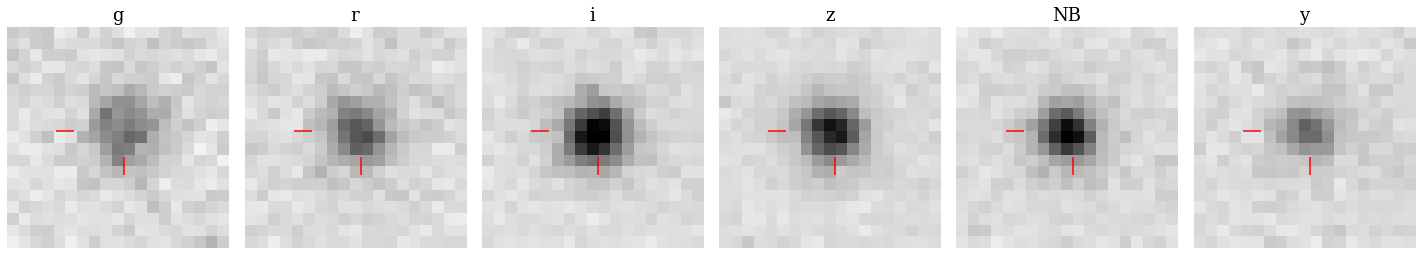

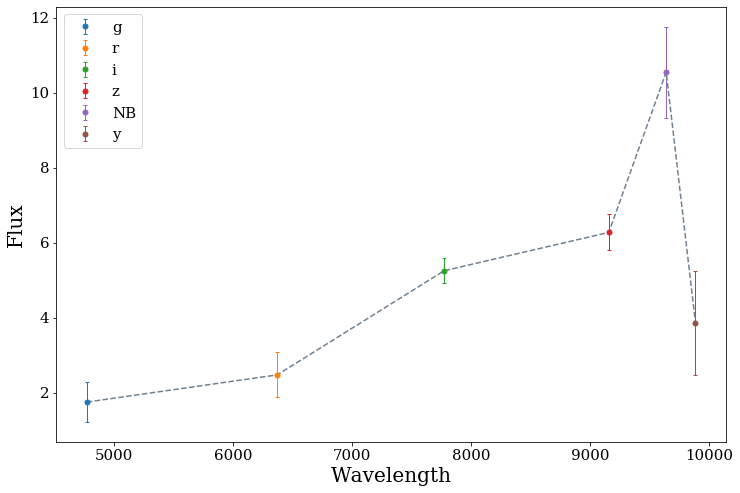

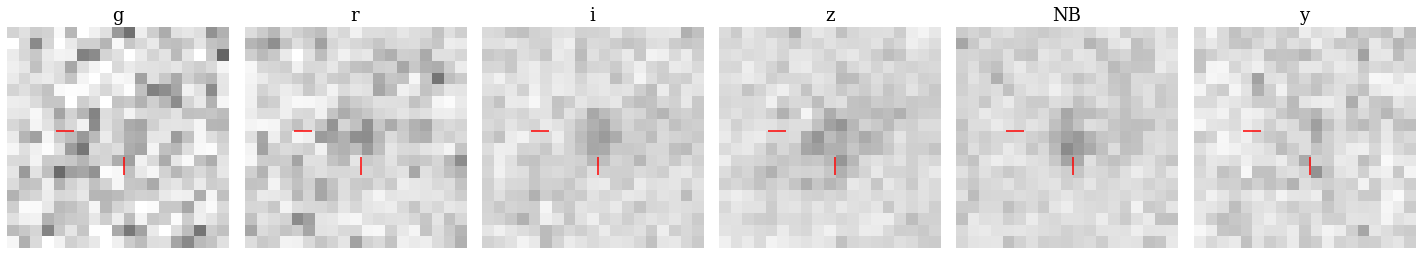

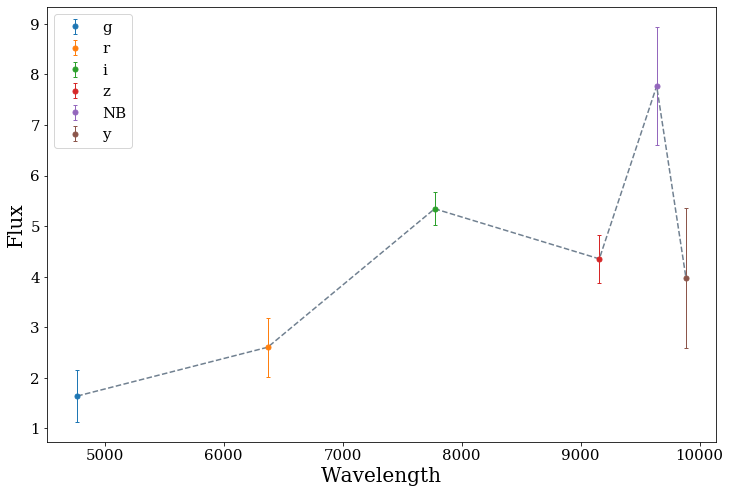

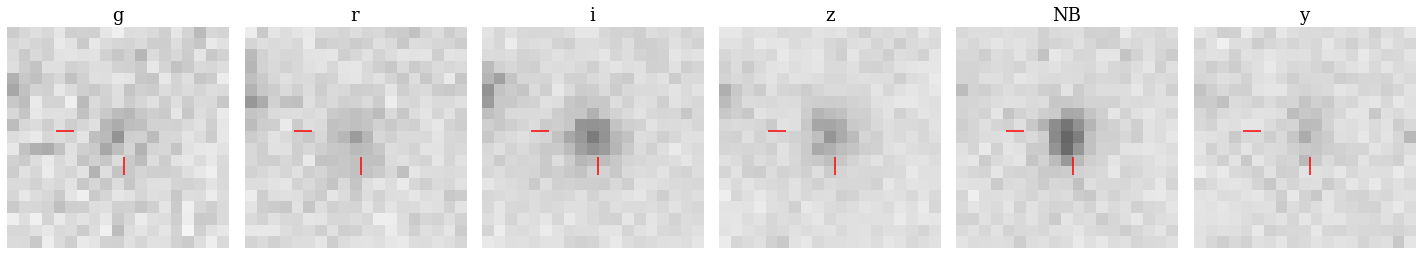

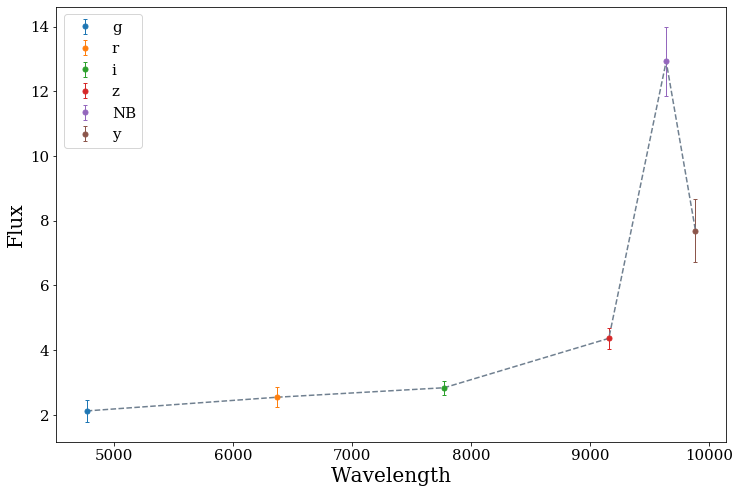

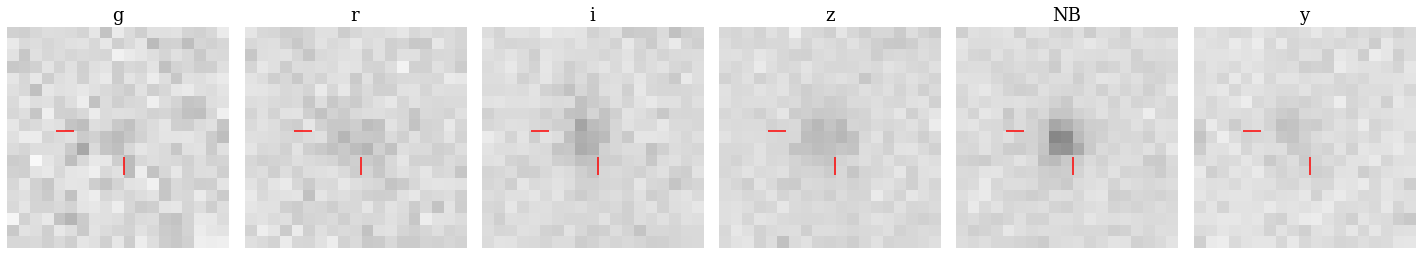

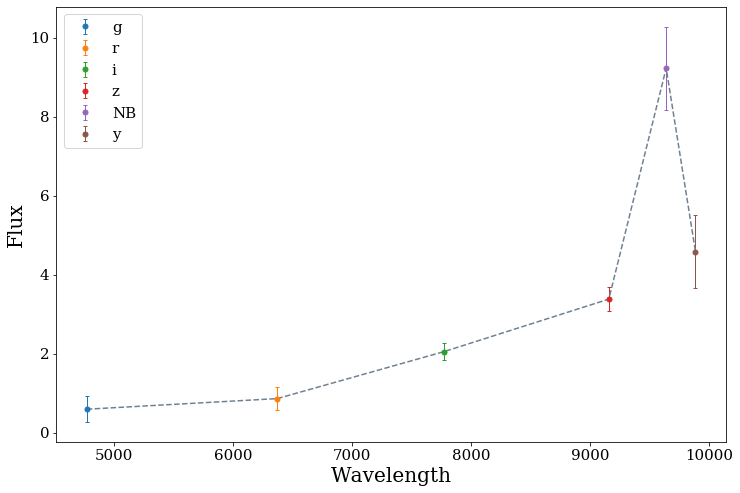

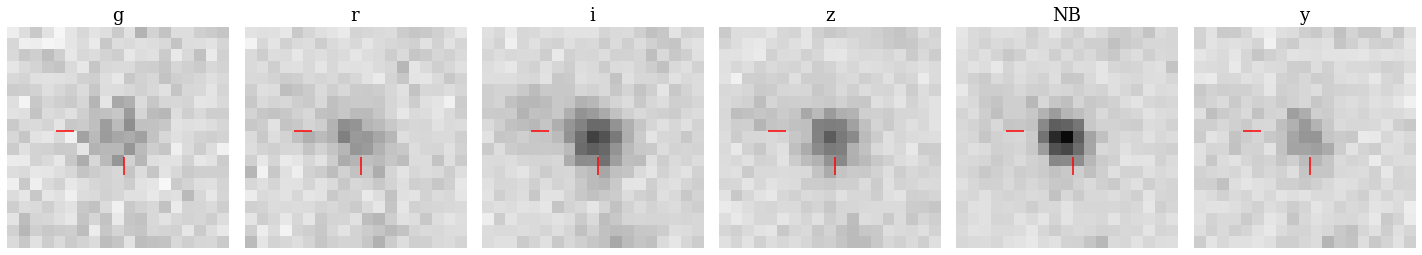

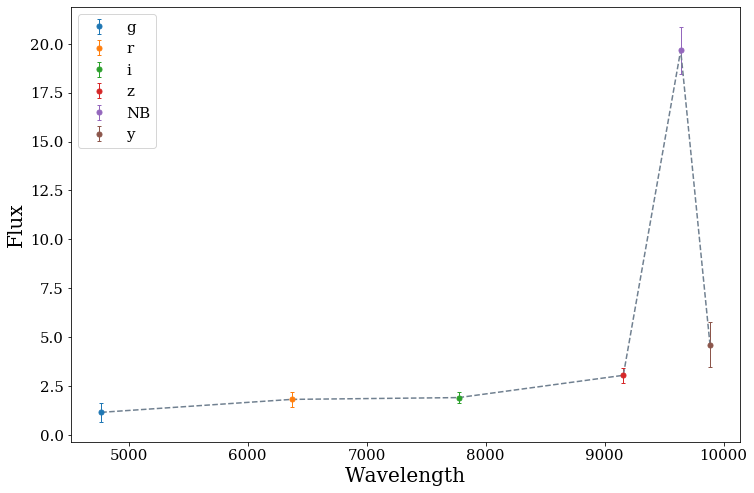

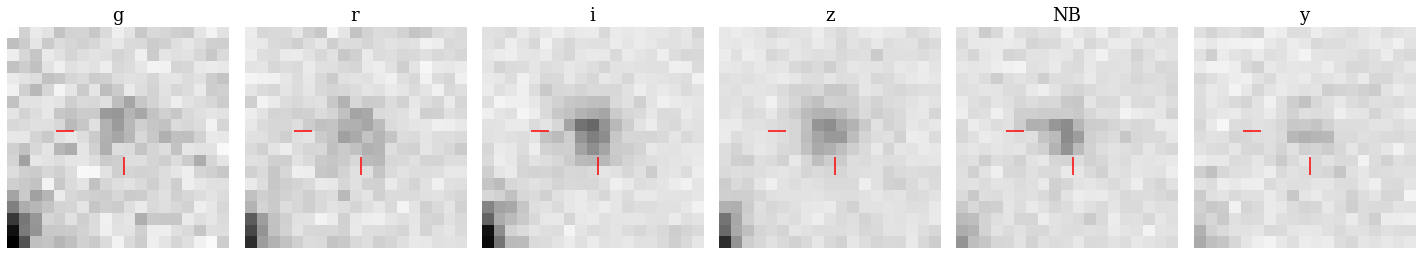

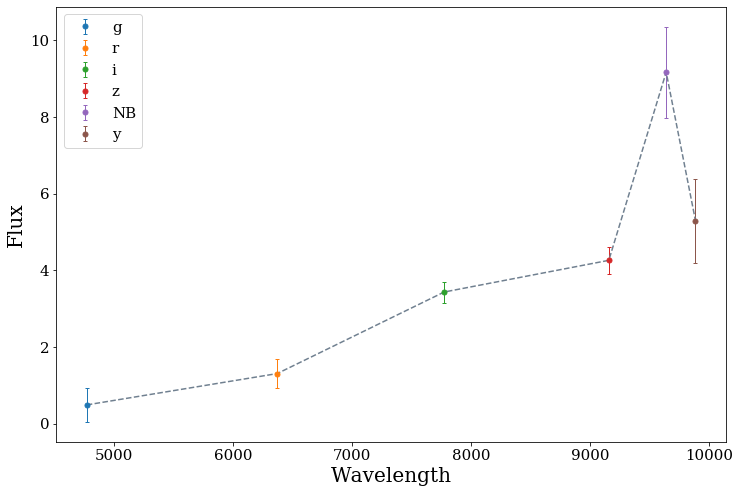

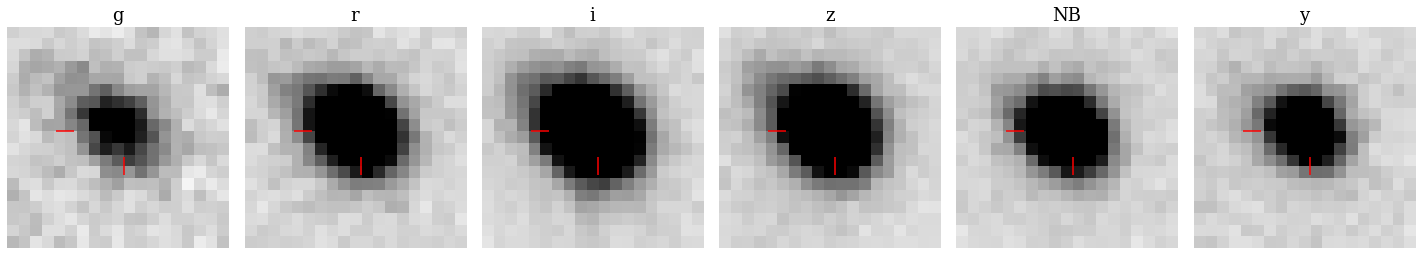

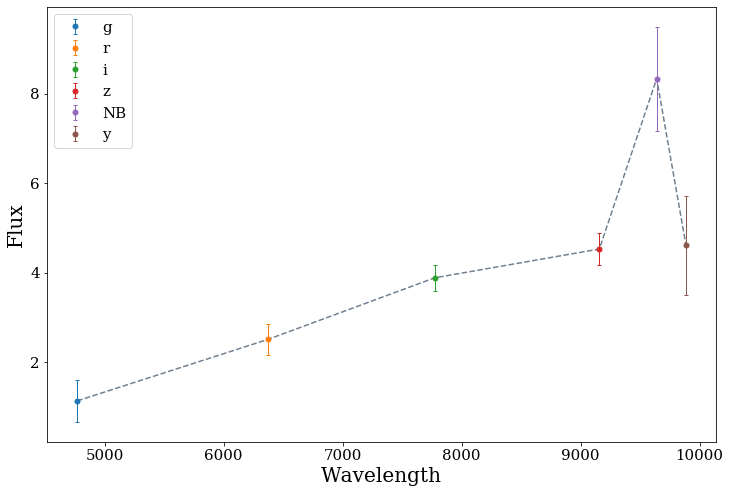

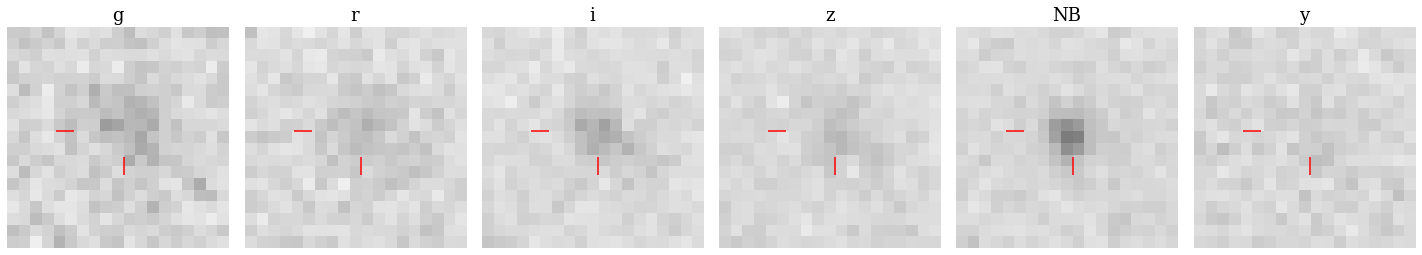

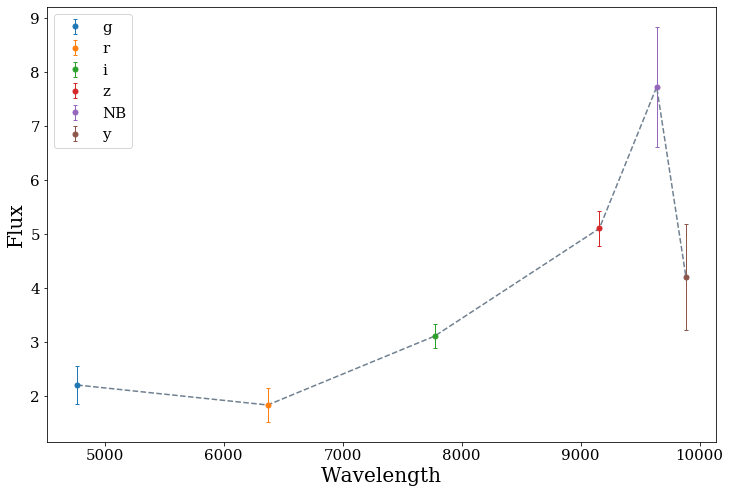

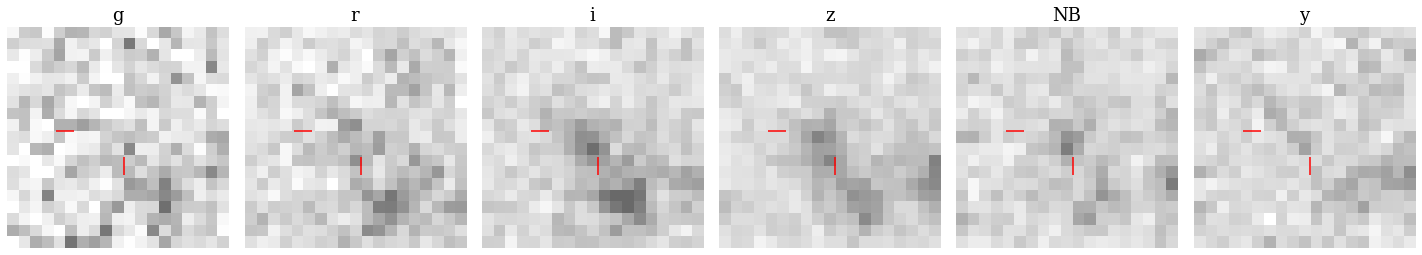

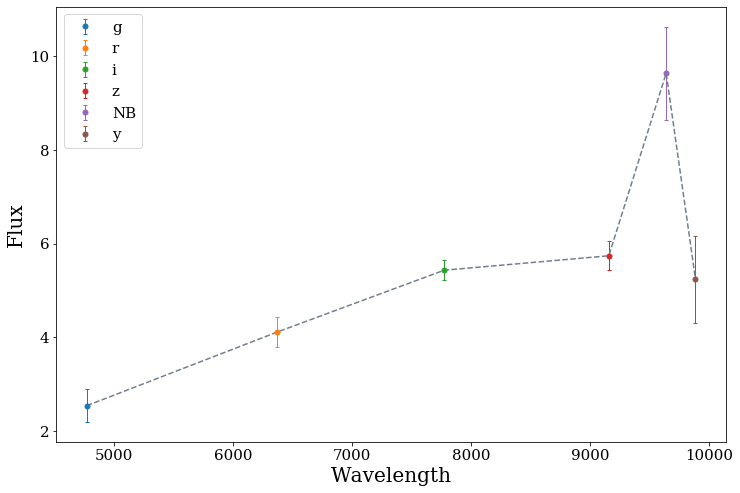

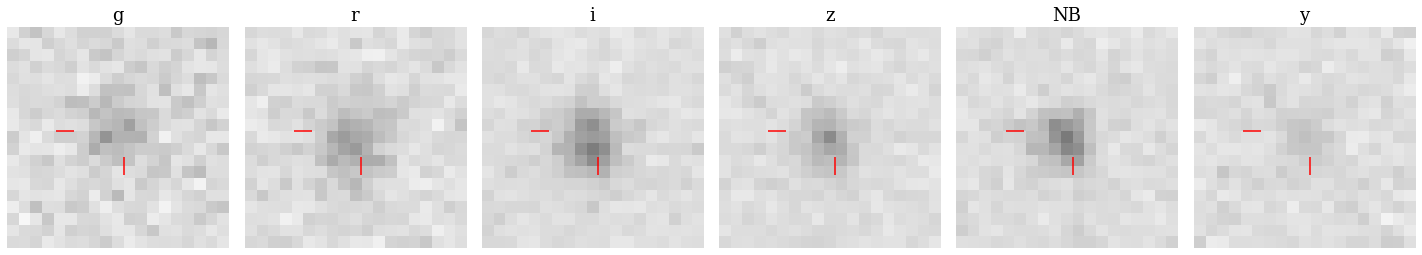

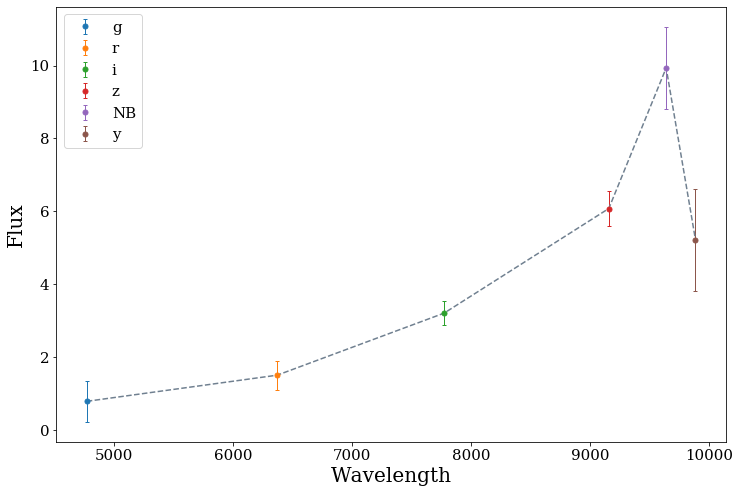

In [50]:
RA_ = data_a['ALPHA_J2000'][6000:6010]
DEC_ = data_a['DELTA_J2000'][6000:6010]

nsf_id = choosef(RA_,DEC_,info)
data_filters = [data_g, data_r, data_i, data_z,data_NB, data_y]
hdr_filters = [hdr_g, hdr_r, hdr_i, hdr_z, hdr_NB,hdr_y]
names_filters = ['g', 'r', 'i', 'z', 'NB', 'y']
flux_filters = [g,r,i,z,NB,y]
flux_errors = [g_err,r_err,i_err,z_err,NB_err,y_err]
NSF_cutm = cuts_mult(nsf_id, data_filters, hdr_filters, names_filters,flux_filters, flux_errors, 5, 'NSF')